In [101]:
import numpy as np
from shapely.geometry import Polygon, LineString, Point, MultiPoint
import pandas as pd
import matplotlib.pyplot as plt
import time

In [60]:
a = pd.read_csv(r'e:\argoverse-api-ccuse\forecasting_sample\data\22.csv')
a['index'] = a.index
a.sort_values('OBJECT_TYPE', inplace=True)
print(a)

        TIMESTAMP                              TRACK_ID OBJECT_TYPE  \
367  3.159664e+08  00000000-0000-0000-0000-000000001557       AGENT   
179  3.159664e+08  00000000-0000-0000-0000-000000001557       AGENT   
333  3.159664e+08  00000000-0000-0000-0000-000000001557       AGENT   
170  3.159664e+08  00000000-0000-0000-0000-000000001557       AGENT   
403  3.159664e+08  00000000-0000-0000-0000-000000001557       AGENT   
..            ...                                   ...         ...   
172  3.159664e+08  00000000-0000-0000-0000-000000001525      OTHERS   
171  3.159664e+08  00000000-0000-0000-0000-000000001576      OTHERS   
169  3.159664e+08  00000000-0000-0000-0000-000000001569      OTHERS   
183  3.159664e+08  00000000-0000-0000-0000-000000001284      OTHERS   
464  3.159664e+08  00000000-0000-0000-0000-000000001584      OTHERS   

               X            Y CITY_NAME  index  
367  3503.713091  1930.714353       PIT    367  
179  3522.675446  1948.341676       PIT    179  


In [123]:
q = Point(np.array(a[['X', 'Y','index']]))
q

TypeError: only size-1 arrays can be converted to Python scalars

[[3503.71309138 1930.71435338  367.        ]
 [3522.67544618 1948.34167558  179.        ]
 [3507.14714094 1933.82527871  333.        ]
 ...
 [3555.61723081 1983.84342771  169.        ]
 [3509.71968744 1928.98452647  183.        ]
 [3569.31260159 1991.18180986  464.        ]]


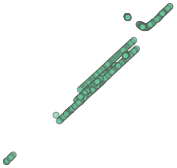

In [91]:
print(np.array(a[['X', 'Y','index']]))
p = MultiPoint(np.array(a[['X', 'Y','index']]))
p

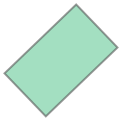

In [62]:
x = Polygon([[3509.572295, 1893.417704],
             [3468.010026, 1936.690996],
             [3540.132179, 2005.961444],
             [3581.694448, 1962.688153]])
x

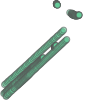

               0            1      2
0    3491.963605  1912.776704  168.0
1    3492.733947  1920.949210  462.0
2    3492.743989  1913.422700  177.0
3    3493.526190  1914.055479  186.0
4    3493.831827  1921.862123  452.0
..           ...          ...    ...
359  3560.152003  1984.247244  246.0
360  3560.284566  1984.283017  257.0
361  3560.349023  1983.706974   72.0
362  3560.473536  1984.135962   64.0
363  3560.628095  1984.275771  235.0

[364 rows x 3 columns]
                 0            1
168.0  3491.963605  1912.776704
462.0  3492.733947  1920.949210
177.0  3492.743989  1913.422700
186.0  3493.526190  1914.055479
452.0  3493.831827  1921.862123
...            ...          ...
246.0  3560.152003  1984.247244
257.0  3560.284566  1984.283017
72.0   3560.349023  1983.706974
64.0   3560.473536  1984.135962
235.0  3560.628095  1984.275771

[364 rows x 2 columns]
(364, 3)


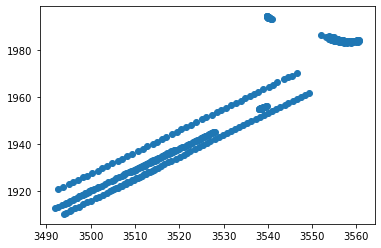

In [80]:
# display(p)
ins = x.intersection(p)
display(ins)
print(pd.DataFrame(np.array(ins)))
plt.scatter(np.array(ins)[:,0],np.array(ins)[:,1])
s = pd.DataFrame(np.array(ins)[:,:2], index=np.array(ins)[:,2])
print(s)
print(np.array(ins).shape)

In [71]:
s = pd.DataFrame(index=np.array(ins)[:,2])
print(s)

Empty DataFrame
Columns: []
Index: [168.0, 462.0, 177.0, 186.0, 452.0, 204.0, 195.0, 459.0, 205.0, 1.0, 441.0, 215.0, 8.0, 213.0, 223.0, 431.0, 14.0, 225.0, 234.0, 237.0, 20.0, 421.0, 245.0, 251.0, 27.0, 263.0, 411.0, 35.0, 256.0, 275.0, 284.0, 43.0, 268.0, 403.0, 296.0, 51.0, 308.0, 280.0, 394.0, 59.0, 320.0, 292.0, 67.0, 385.0, 349.75, 304.0, 75.0, 83.0, 376.0, 316.0, 91.0, 328.0, 367.0, 99.0, 340.0, 106.0, 6.0, 356.0, 113.0, 352.0, 9.0, 121.0, 345.0, 363.0, 129.0, 15.0, 138.0, 333.0, 373.0, 463.0, 21.0, 147.0, 382.0, 156.0, 321.0, 28.0, 165.0, 391.0, 174.0, 0.0, 36.0, 309.0, 183.0, 400.0, 7.0, 44.0, 192.0, 13.0, 201.0, 297.0, 408.0, 19.0, 52.0, 210.0, 417.0, 220.0, 26.0, 285.0, 60.0, 231.0, ...]

[364 rows x 0 columns]


In [138]:
c = pd.merge(a,s,left_index=True,right_index=True,how='inner')

,TIMESTAMP,TRACK_ID,OBJECT_TYPE,X,Y,CITY_NAME,index,0,1
0,3.159664e+08,00000000-0000-0000-0000-000000000000,AV,3509.228124,1928.077631,PIT,0,3509.228124,1928.077631
1,3.159664e+08,00000000-0000-0000-0000-000000001284,OTHERS,3494.828049,1915.142662,PIT,1,3494.828049,1915.142662
2,3.159664e+08,00000000-0000-0000-0000-000000001557,AGENT,3546.488883,1970.470709,PIT,2,3546.488883,1970.470709
5,3.159664e+08,00000000-0000-0000-0000-000000001471,OTHERS,3538.088598,1954.956160,PIT,5,3538.088598,1954.956160
6,3.159664e+08,00000000-0000-0000-0000-000000001392,OTHERS,3504.777707,1920.494448,PIT,6,3504.777707,1920.494448
...,...,...,...,...,...,...,...,...,...
459,3.159664e+08,00000000-0000-0000-0000-000000001588,OTHERS,3494.482165,1910.543533,PIT,459,3494.482165,1910.543533
460,3.159664e+08,00000000-0000-0000-0000-000000001576,OTHERS,3553.885543,1986.089376,PIT,460,3553.885543,1986.089376
461,3.159664e+08,00000000-0000-0000-0000-000000001583,OTHERS,3540.139065,1994.359253,PIT,461,3540.139065,1994.359253
462,3.159664e+08,00000000-0000-0000-0000-000000001557,AGENT,3492.733947,1920.949210,PIT,462,3492.733947,1920.949210


In [ ]:
c.drop('index',inplace=True,axis=1)

In [134]:
c

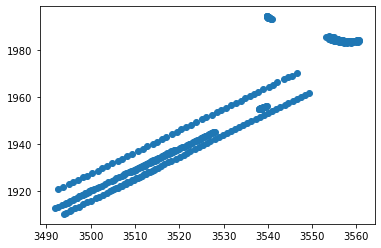

In [76]:
plt.scatter(c['X'],c['Y'])

In [122]:
tic =time.time()
for i in range(1):
    MultiPoint(a[['X', 'Y','index']].to_numpy())
print((time.time()-tic)*1000)

tic =time.time()
for i in range(1):
    MultiPoint(np.array(a[['X', 'Y','index']]))
print((time.time()-tic)*1000)

5.984067916870117
3.9887428283691406


In [126]:
tic =time.time()
Polygon([[3509.572295, 1893.417704],
             [3468.010026, 1936.690996],
             [3540.132179, 2005.961444],
             [3581.694448, 1962.688153]]).intersection(MultiPoint(np.array(a[['X', 'Y','index']])))
print((time.time()-tic)*1000)

6.979703903198242
